# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [57]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [58]:
# YOUR CODE HERE
df = pd.read_csv('sharktank.csv')
df.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [59]:
# YOUR CODE HERE

df.loc[:, "Corcoran":"Guest"] = df.loc[:,"Corcoran":"Guest"].fillna(0) # .loc gets rows or columns and ':' iterates till the ending col 
df # fillna fills NaN values will arguement


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [60]:
df["Amount"] = df["Amount"].str[1:] # we want to take off the dollar sign 
df["Equity"] = df["Equity"].str[:-1] # take of percentage at end

df["Amount"] = df["Amount"].str.replace(',', '').astype(float) # remove comma, change the type
df["Equity"] = df["Equity"].astype(float) # change type

df

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,100000.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,225000.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,300000.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [61]:
temp_shark = df[df["Amount"].notnull()].copy() # create a new df where rows are not null for amount
temp_shark.reset_index(drop = True, inplace = True) # reset the index's, discard the old index col
temp_shark[temp_shark["Equity"] == 0] # filter to show rows that have equity as 0



,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
150,5.0,13.0,The Wall DoctoRX,Yes,Lifestyle / Home,Male,150000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,exclusive rights to sell internationally


In [62]:
# drop 150 since it apeared as 0 equity

curr_shark = temp_shark.drop(150)
curr_shark


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,2.0,A Perfect Pear,Yes,Food and Beverage,Female,500000.0,50.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
3,1.0,2.0,Classroom Jams,Yes,Children / Education,Male,250000.0,10.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN
4,1.0,3.0,Turbobaster,Yes,Food and Beverage,Female,35000.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2% royalty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,6.0,28.0,SynDaver Labs,Yes,Healthcare,Male,3000000.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
245,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,100000.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
246,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,225000.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
247,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,300000.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [63]:
valuable = curr_shark["Amount"] / curr_shark["Equity"] * 100 # ratio of amount divided by equity
curr_shark.loc[[valuable.idxmax()]]

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
206,6.0,11.0,Zipz,Yes,Food and Beverage,Male,2500000.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,with an option for another $2.5 Million for an...


Zips was the most valuable company.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

<Axes: >

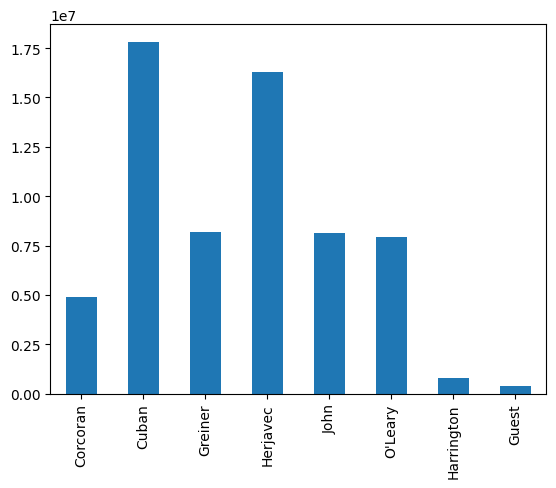

In [64]:
# ENTER CODE HERE.

# sets up inline plotting 
%matplotlib inline

# create a copy of the DataFrame 'df' and store it in 'df_by_amount'
df_amount = df

# Cclculate the proportion of the "Amount" column for each row distributed among categories
df_amount['SummedTotal'] = df.Amount / df.loc[:,'Corcoran':'Guest'].sum(axis=1)

# multiply each category's value by the corresponding proportion for each row
# sum the results for each category across all rows
# plot the result as a bar plot
df_amount.loc[:,'Corcoran':'Guest'].multiply(df_amount['SummedTotal'], axis=0).sum(axis=0).plot.bar()

**YOUR EXPLANATION HERE**

According to my graph, Cuban invested the most.

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

<Axes: xlabel='Industry'>

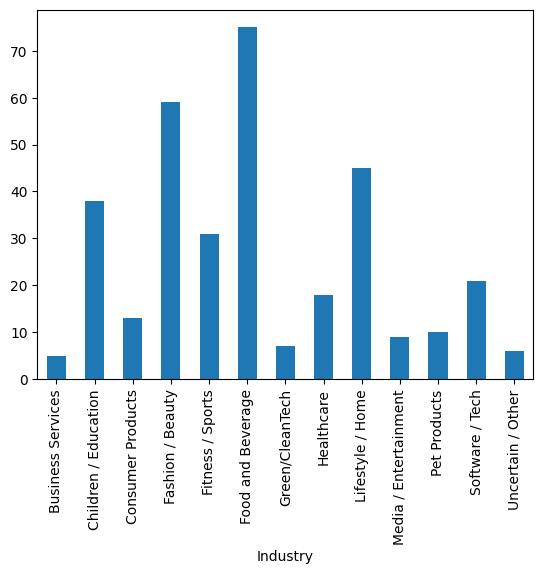

In [65]:
# ENTER CODE HERE.

df["Number of Sharks"] = df.loc[:, "Corcoran":"Guest"].sum(axis=1)
df.groupby("Industry")["Number of Sharks"].sum().plot.bar()

The Sharks invested in food and beverage out of any other company. Therefore, they beleieve the food industry is the most preferable to invest in.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the Notebook (ipynb) to canvas (one submission per group).

4. Demo your lab by next Tuesday for full credit.